# Set-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os


In [2]:
DIR = '/content/drive/My Drive/ml-mini-projects/black-friday'

# Framing of the Problem

## Challenge:

The following dataset contains information from stores on a Black Friday, which sometimes refer to the Thanksgiving Friday in the US. You are tasked to build a model to predict the purchase amount of customers against various products.

**Evaluation Metric:** RMSE <br>
**Top scorer score:** 2372.0034421821

**Notes:** <br>
This challenge and dataset was sourced from [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/black-friday/?utm_source=facebook.com&utm_medium=social)


**Approach:** Regression Problem

# Taking Quick Glances

In [3]:
df = pd.read_csv(os.path.join(DIR, 'train.csv'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Observations:**
* It has a total of 550, 068 entries with 12 columns
   * Not so many features. Let's not do feature selection first
* Data types
   * User_ID, Product_ID 
      * not sure if this will help; try dropping
   * Gender, City Category as strings
      * hot encode this
   * Age, Stay In Current City Years are unexpectedly written as strings
      * Label Encoding - try converting to int or float (check unique values to decide)
   * Occupation is int (so already label encoded)
      * This may be placed for a reason. Let's try using this before hot encoding
   * Marital Status is already in its correct form
   * Product Category 1 and 2 are ints and 3 are floats.
      * can we convert Product Category 3 as int too?
      * also let's try to use this(label encoded) before doing one-hot
   * Purchase
      * does this represent the actual or in thousands or what? (no info to verify this)
* Nulls
   * Product Category 2 and 3 have many nulls


1. Let's first deal with the nulls

In [5]:
pd.concat([pd.DataFrame(df.isna().sum(), columns=['count']),(pd.DataFrame((df.isna().sum()/df.shape[0])*100, columns=['percentage']))], axis=1)

,count,percentage
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


In [6]:
# what if we drop Product_Category_2 only? How will that affect Product Category 3?
df_dum = df.dropna(subset=['Product_Category_2'])
df_dum.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            209609
Purchase                           0
dtype: int64

**Possible approach for NaNs**
1. If we drop all the nulls,
   * we will only be left with 166,821 which is 30% of the original dataset.
2. If we drop only Product_Category_2, 
   * 173, 638 are deducted so it means, those that are null in Product_Category_2 are also null in Product_Category_3
3. Replace nulls with 0s
   * I'll be trying this approach



In [7]:
df = df.fillna(0)

2. Are there duplicates? none.

In [8]:
# are there duplicates?
df.duplicated().sum()

0

3. Convert Product_Category_3

In [9]:
# look on unique values per column and number of unique values
for col in list(df.columns):
  print(col, df[col].unique(), len(df[col].unique()))

User_ID [1000001 1000002 1000003 ... 1004113 1005391 1001529] 5891
Product_ID ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'] 3631
Gender ['F' 'M'] 2
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 7
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 21
City_Category ['A' 'C' 'B'] 3
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0'] 5
Marital_Status [0 1] 2
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 20
Product_Category_2 [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 18
Product_Category_3 [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] 16
Purchase [ 8370 15200  1422 ...   135   123   613] 18105


Product_Category_2 and Product_Category_3 are actually integers. Let's convert them to integers

In [10]:
df = df.astype({'Product_Category_2':'int64', 'Product_Category_3':'int64'})

In [11]:
df.info() # sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


Other attributes' data type won't be changed for visualization but will be changed for data prep for ML

# Prepocessing

In [12]:
# let's drop User_ID and Product_ID
df_app = df.drop(columns=['User_ID', 'Product_ID'], axis=1)
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  int64 
 7   Product_Category_2          550068 non-null  int64 
 8   Product_Category_3          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


* Convert to Integer
 1. Age
 2. Stay_In_Current_Years
 

* Hot Encode
 1. Gender
 2. City Category

In [13]:
df_app['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df_app['Age'] = df_app['Age'].replace(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], [0, 1, 2, 3, 4, 5, 6])

In [15]:
df_app['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [16]:
df_app['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df_app['Stay_In_Current_City_Years'] = df_app['Stay_In_Current_City_Years'].replace('4+', '4')
df_app['Stay_In_Current_City_Years'] = df_app['Stay_In_Current_City_Years'].astype('int64')

In [18]:
df_app['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [19]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  int64 
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  int64 
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  int64 
 7   Product_Category_2          550068 non-null  int64 
 8   Product_Category_3          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 42.0+ MB


# Training and Prediction

In [20]:
from sklearn.model_selection import train_test_split 
from scipy import stats

X = df_app.drop(columns=['Purchase'])
y = df_app['Purchase']
#y = stats.boxcox(df_app['Purchase'])[0]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
y_train = stats.boxcox(y_train)[0]

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

ord_cols = ['Product_Category_2', 'Product_Category_3']
ord_transformer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)

nom_cols = ['Gender', 'City_Category']
nom_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
                                    ('ord_cat', ord_transformer, ord_cols),
                                    ('nom_cat', nom_transformer, nom_cols)
])



In [24]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

#model = RandomForestRegressor( n_estimators=130, random_state=42, n_jobs=-1, verbose = 2, max_depth = 5)
#model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 1,
#               max_depth = 10, alpha = 5, n_estimators = 200, n_jobs=-1, verbose=2)
model = GradientBoostingRegressor(n_estimators=100, max_depth=10, learning_rate=0.1,tol=5, verbose=2)

In [25]:
reg = Pipeline([
                ('preprocessor', preprocessor),
                ('model', model),
])

In [26]:
reg.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        7894.5540           52.22s
         2        7623.1977           52.65s
         3        7394.9185           51.99s
         4        7210.0721           51.05s
         5        7060.1613           50.99s
         6        6942.8183           50.02s
         7        6847.7346           49.38s
         8        6766.3771           48.76s
         9        6700.3661           48.39s
        10        6646.8798           47.66s
        11        6603.5354           47.12s
        12        6569.9648           46.62s
        13        6541.0220           46.11s
        14        6517.3722           45.63s
        15        6498.3341           45.16s
        16        6482.7779           44.63s
        17        6470.1913           44.08s
        18        6460.0902           43.55s
        19        6451.7768           42.95s
        20        6445.0651           42.46s
        21        6439.5291           41.97s
        2

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ord_cat',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=0,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['Product_Category_2',
                                                   'Product_Category_3']),
                                                 ('nom_cat',
        

In [27]:
reg.score(X_train, y_train)

0.22101156722750304

In [28]:
reg.score(X_val, y_val) #R2

-3.197468383144913

In [29]:
y_preds = reg.predict(X_val)

In [30]:
# RMSE
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(stats.boxcox(y_val)[0], y_preds))

77.58511738400607

# Test

In [31]:
df_test = pd.read_csv(os.path.join(DIR, 'test.csv'))

In [32]:
df_test = df_test.fillna(0)

In [33]:
df_test = df_test.astype({'Product_Category_2':'int64', 'Product_Category_3':'int64'})

In [34]:
df_test = df_test.drop(columns=['User_ID', 'Product_ID'], axis=1)

In [35]:
df_app['Age'] = df_test['Age'].replace(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], [0, 1, 2, 3, 4, 5, 6])

In [36]:
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].replace('4+', '4')
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].astype('int64')

In [37]:
from sklearn.model_selection import train_test_split 
from scipy import stats

X_test = df_test

In [38]:
y_preds_test = reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


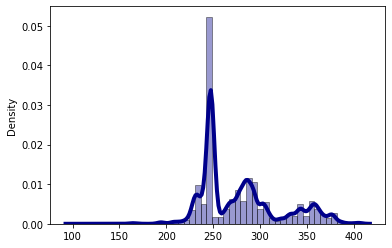

In [39]:
sns.distplot(y_preds_test, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Results (RSME):
* GradientBoostingRegressor - 77.58511738400607
* XGBoost - 77.59737917802637
* RandomForestRegressor - 79.85704311414509